# HOSPITAL DATA ANALYSIS

### Disclaimer:
The data used in this notebook is confidential and cannot be shared publicly. This notebook is solely intended to demonstrate the methodology and construction of the analysis. It is not authorized for distribution or external use.

## Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

## Uploading the file

In [35]:
file = "C:/Users/shrey/DataAnalysis/krankenhaus.xlsx"
# xls = pd.ExcelFile(file_name)
# print(xls.sheet_names)
hospitals = " KHV_2022"
states = "Land"

## Importing Data 

In [37]:
hospitals_df = pd.read_excel(file, hospitals, header=2)
states_df = pd.read_excel(file, states, header=2)

## Inspecting DataFrame

### 1. Shape and Size of the dataframe

In [40]:
print(f" KHV_2022: {hospitals_df.shape}")
print(f" Land: {states_df.shape}")

 KHV_2022: (2788, 172)
 Land: (16, 2)


### 2. DataFrames Information Overview

In [42]:
hospitals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Columns: 172 entries, Land to 3759
dtypes: float64(150), int64(12), object(10)
memory usage: 3.7+ MB


In [43]:
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Schlüssel  16 non-null     int64 
 1   Land       16 non-null     object
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


### 3. Column Names in DataFrames

In [45]:
print(hospitals_df.columns.tolist())

['Land', 'Kreis', 'Gemeinde', 'Adresse_Name', 'Adresse_Name_Standort', 'Adresse_Strasse_Standort', 'Adresse_Haus-Nr._Standort', 'Adresse_Postleitzahl_Standort', 'Adresse_Ort_Standort', 'Telefonvorwahl/-nummer', 'E-Mail Adresse', 'Internet-Adresse', 'Traeger', 'T_Name', 'EinrichtungsTyp', 'Allgemeine_Notfallversorgung', 'Spezielle_Notfallversorgung', 'Spezielle_Notfallversorgung.1', 'Spezielle_Notfallversorgung.2', 'Spezielle_Notfallversorgung.3', 'Spezielle_Notfallversorgung.4', 'INSG', '0100', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0114', '0150', '0151', '0152', '0153', '0154', '0156', '0200', '0224', 260, 261, '0300', '0400', '0410', '0436', '0500', '0510', '0524', '0533', '0600', '0607', '0610', '0700', '0706', '0710', '0800', '0900', '0910', 1000, 1004, 1005, 1006, 1007, 1009, 1011, 1012, 1014, 1028, 1050, 1051, 1100, 1136, 1200, 1300, 1400, 1410, 1500, 1513, 1516, 1518, 1519, 1520, 1523, 1536, 1550, 1551, 1600, 1700, 1800, 1900, 2000, 2021, 2036, 2050, 21

In [46]:
print(states_df.columns.tolist())

['Schlüssel', 'Land']


### 4. Renaming the column names

In [48]:
hospitals_df.columns = hospitals_df.columns.astype(str)
column_renaming_mapping = {
    "Spezielle_Notfallversorgung": "Schwerverletztenversorgung",
    "Spezielle_Notfallversorgung.1": "Notfallversorgung_Kinder",
    "Spezielle_Notfallversorgung.2": "Spezialversorgung",
    "Spezielle_Notfallversorgung.3": "Schlaganfallversorgung",
    "Spezielle_Notfallversorgung.4": "Durchblutungsstoerungen_am_Herzen",
    "0100": "Innere Medizin",
    "1500": "Allgemeine Chirurgie",
    "2900": "Allgemeine Psychiatrie",
    "2800": "Neurologie",
    "2400": "Frauenheilkunde und Geburtshilfe",
    "0200": "Geriatrie",
    "0300": "Kardiologie",
    "1600": "Endokrinologie",
    "2300": "Orthopädie",
    "2200": "Urologie"
}

hospitals_df.rename(columns=column_renaming_mapping, inplace=True)

print(hospitals_df.columns.tolist())

['Land', 'Kreis', 'Gemeinde', 'Adresse_Name', 'Adresse_Name_Standort', 'Adresse_Strasse_Standort', 'Adresse_Haus-Nr._Standort', 'Adresse_Postleitzahl_Standort', 'Adresse_Ort_Standort', 'Telefonvorwahl/-nummer', 'E-Mail Adresse', 'Internet-Adresse', 'Traeger', 'T_Name', 'EinrichtungsTyp', 'Allgemeine_Notfallversorgung', 'Schwerverletztenversorgung', 'Notfallversorgung_Kinder', 'Spezialversorgung', 'Schlaganfallversorgung', 'Durchblutungsstoerungen_am_Herzen', 'INSG', 'Innere Medizin', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0114', '0150', '0151', '0152', '0153', '0154', '0156', 'Geriatrie', '0224', '260', '261', 'Kardiologie', '0400', '0410', '0436', '0500', '0510', '0524', '0533', '0600', '0607', '0610', '0700', '0706', '0710', '0800', '0900', '0910', '1000', '1004', '1005', '1006', '1007', '1009', '1011', '1012', '1014', '1028', '1050', '1051', '1100', '1136', '1200', '1300', '1400', '1410', 'Allgemeine Chirurgie', '1513', '1516', '1518', '1519', '1520', '1523

## Handling Missing values

In [50]:
start_column_name = hospitals_df.columns[21]  
print("Start column name :" ,start_column_name)

Start column name : INSG


In [51]:
hospitals_df.loc[:, start_column_name:] = hospitals_df.loc[:, start_column_name:].replace('-', 0).fillna(0)
#modified_file = "C:/Users/shrey/Downloads/Modified_KHV_2022.xlsx" 
#df.to_excel(modified_file, index=True) 

C:\Users\shrey\AppData\Local\Temp\ipykernel_2556\2921989577.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hospitals_df.loc[:, start_column_name:] = hospitals_df.loc[:, start_column_name:].replace('-', 0).fillna(0)


In [52]:
numerical_start_column = hospitals_df.columns[22]  
print("Start column name :" ,numerical_start_column)

Start column name : Innere Medizin


## Data Manipulation

In [54]:
## Converting multiple columns to strings
columns_to_convert = ['Land', 'Traeger','EinrichtungsTyp','Allgemeine_Notfallversorgung']
hospitals_df[columns_to_convert] = hospitals_df[columns_to_convert].astype(str)
#print(hospitals_df['Traeger'])

states_df['Schlüssel'] = states_df['Schlüssel'].astype(str)
# print(states_df['Land'])

In [55]:
land_mapping = dict(zip(states_df['Schlüssel'], states_df['Land']))

hospitals_df['Land'] = hospitals_df['Land'].replace(land_mapping)
# print(hospitals_df)
# final_file = "C:/Users/shrey/Downloads/Final_KHV_2022.xlsx" 
# hospitals_df.to_excel(final_file, index=True) 

## Data Analysis

### 1. Total Number of Hospitals in Germany

In [58]:
total_hospitals = hospitals_df['Adresse_Name'].count()
print(f"Total number of hospitals in Germany: {total_hospitals}")

Total number of hospitals in Germany: 2788


### 2. Total number of Hospitals in Each Federal State

Land
Nordrhein-Westfalen       538
Bayern                    454
Baden-Württemberg         342
Hessen                    233
Niedersachsen             231
Schleswig-Holstein        145
Sachsen                   130
Rheinland-Pfalz           127
Brandenburg               120
Berlin                    115
Hamburg                    83
Thüringen                  80
Mecklenburg-Vorpommern     74
Sachsen-Anhalt             74
Saarland                   26
Bremen                     16
Name: Adresse_Name, dtype: int64


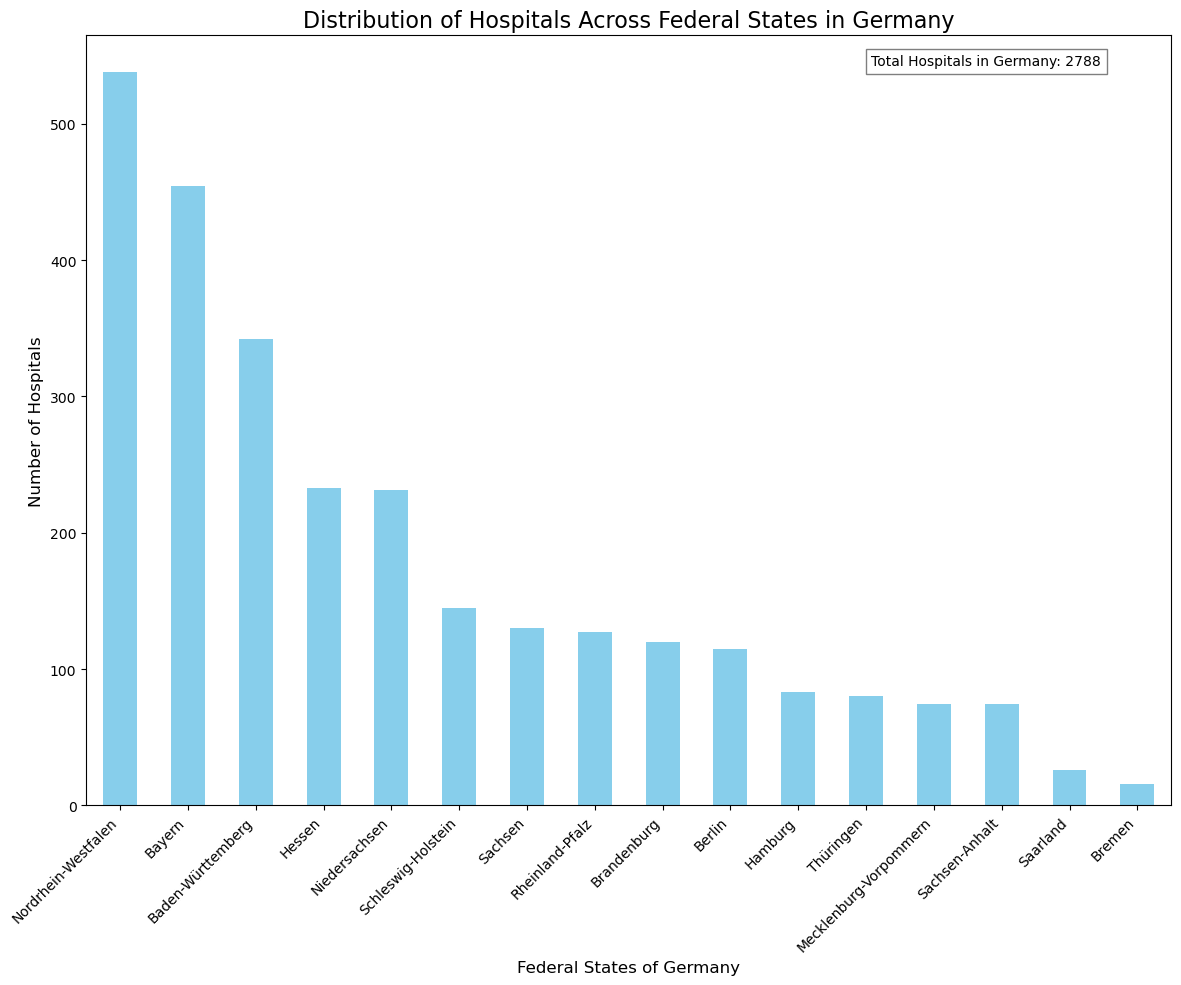

In [114]:
total_hospitals_by_state = hospitals_df.groupby('Land')['Adresse_Name'].count().sort_values(ascending=False)
print(total_hospitals_by_state)

ax = total_hospitals_by_state.plot(kind='bar', figsize=(14, 10), color='skyblue')
plt.title('Distribution of Hospitals Across Federal States in Germany', fontsize=16)
plt.xlabel('Federal States of Germany', fontsize=12)
plt.ylabel('Number of Hospitals', fontsize=12)
plt.xticks(rotation=45, ha='right')
text = f"Total Hospitals in Germany: {total_hospitals}"
plt.gcf().text(0.85, 0.85, text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5), ha='right')
#for container in ax.containers:
    #ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.savefig('Total_Hospitals_by_State.png', dpi=600, bbox_inches='tight')
plt.show()

### 3. Types of Hospital Ownership

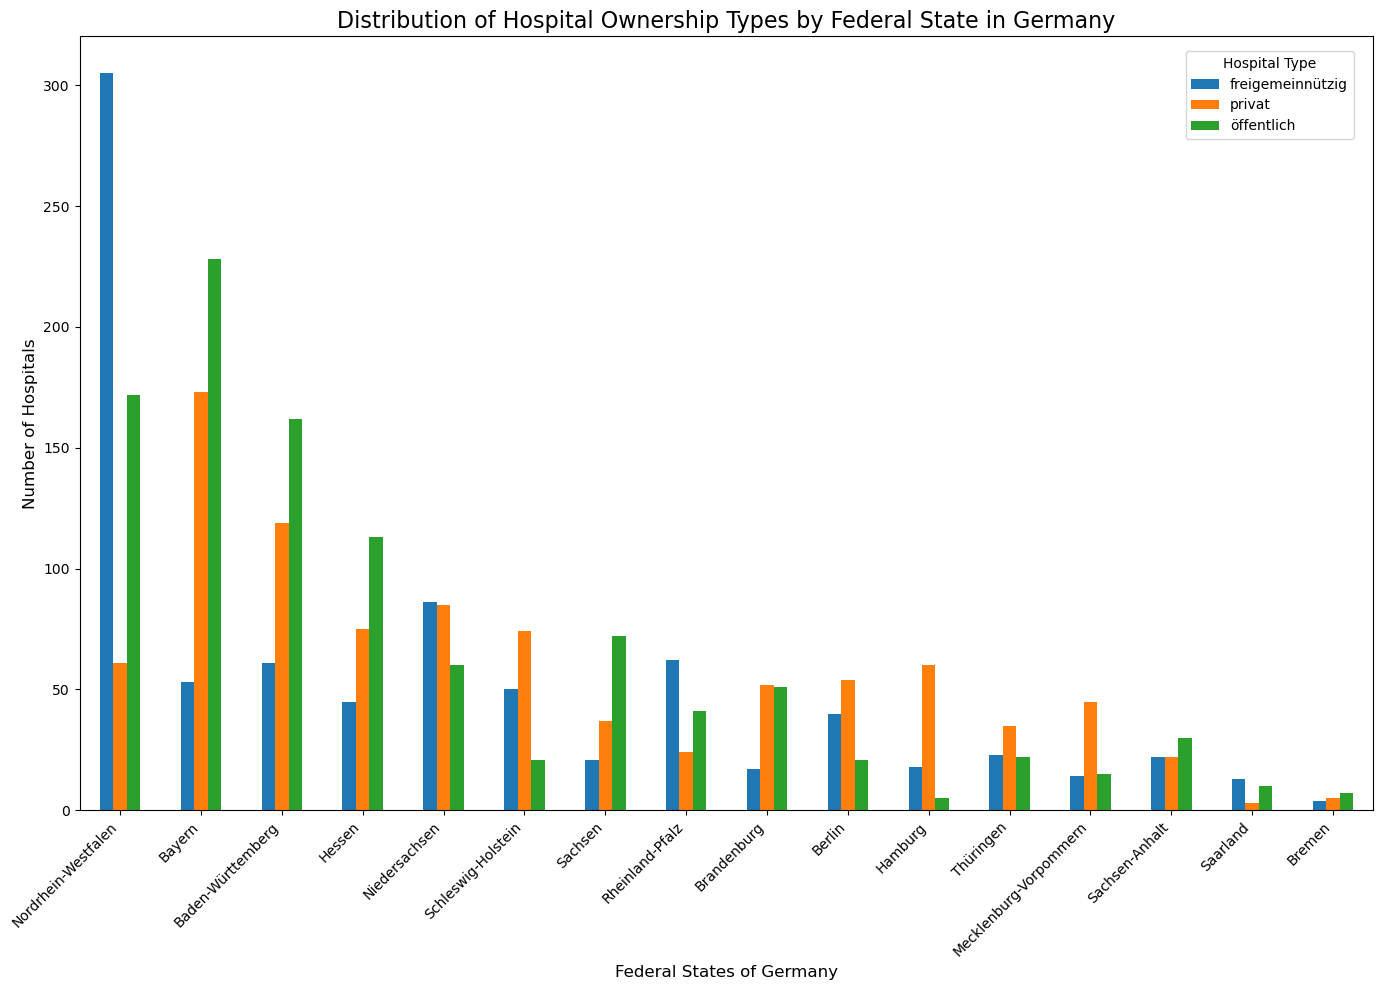

In [110]:
hospital_ownership_type = {"1": "öffentlich", "2": "freigemeinnützig", "3": "privat"}
hospitals_df["Traeger"] = hospitals_df["Traeger"].replace(hospital_ownership_type)
# print(hospitals_df[["Traeger"]])

hospital_ownership_type_counts = hospitals_df.groupby(['Land', 'Traeger']).size().unstack()
#print(hospital_ownership_type_counts)

hospital_ownership_type_counts['Total'] = hospital_ownership_type_counts.sum(axis=1)
#print(hospital_ownership_type_counts['Total'])
hospital_ownership_type_counts = hospital_ownership_type_counts.sort_values(by='Total', ascending=False)
hospital_ownership_type_counts = hospital_ownership_type_counts.drop(columns=['Total'])

ax1 = hospital_ownership_type_counts.plot(kind='bar', figsize=(14, 10), color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.title('Distribution of Hospital Ownership Types by Federal State in Germany',fontsize=16)
plt.xlabel('Federal States of Germany', fontsize=12)
plt.ylabel('Number of Hospitals', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Hospital Type', loc='upper right', bbox_to_anchor=(0.99, 0.99))

#for container in ax1.containers:
    #ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
    
plt.tight_layout()
plt.savefig('Hospital Ownership Types.png', dpi=600, bbox_inches='tight') 
plt.show()


### 4. Analyzing Hospital types

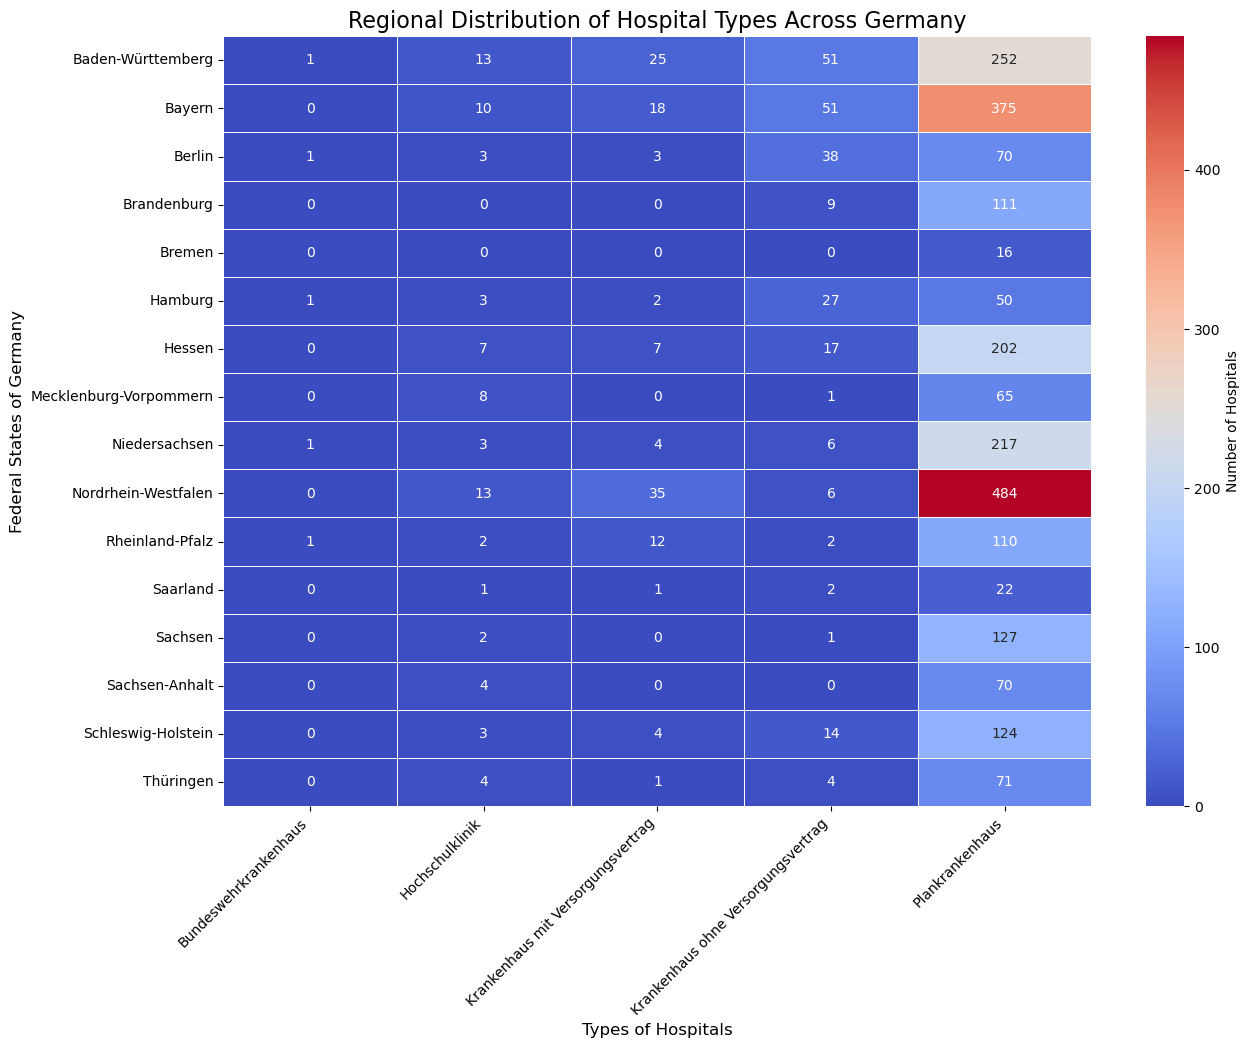

In [64]:
hospital_types = { "1": "Hochschulklinik", "2": "Plankrankenhaus", "3": "Krankenhaus mit Versorgungsvertrag", "4": "Krankenhaus ohne Versorgungsvertrag", "5": "Bundeswehrkrankenhaus"}
hospitals_df["EinrichtungsTyp"] = hospitals_df["EinrichtungsTyp"].replace(hospital_types)

hospital_distribution = hospitals_df['EinrichtungsTyp'].value_counts()
#print(hospital_distribution)

regional_distribution = hospitals_df.groupby(['Land', 'EinrichtungsTyp']).size().unstack(fill_value=0)
#print(regional_distribution)

plt.figure(figsize=(14, 10))
sns.heatmap(regional_distribution, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5, cbar_kws={"label": "Number of Hospitals"}
)
plt.title('Regional Distribution of Hospital Types Across Germany', fontsize=16)
plt.xlabel('Types of Hospitals', fontsize=12)
plt.ylabel('Federal States of Germany', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig('Hospital Institute Types.png', dpi=600, bbox_inches='tight') 
plt.show()


### 5. Analysis of General Inpatient Emergency Care Levels

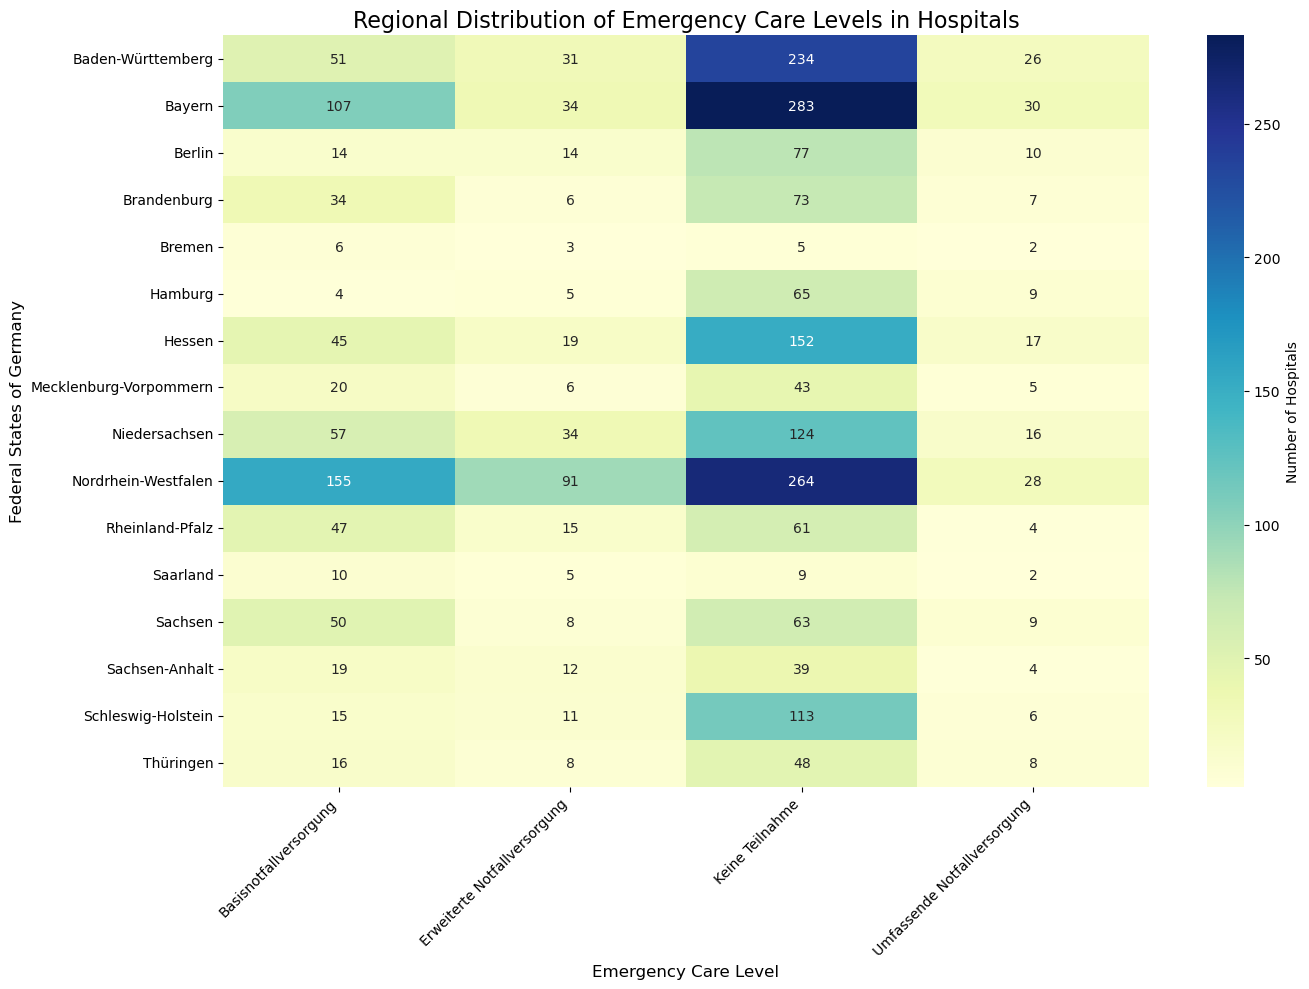

In [66]:
emergency_care_mapping = {
    "0": "Keine Teilnahme",
    "1": "Basisnotfallversorgung",
    "2": "Erweiterte Notfallversorgung",
    "3": "Umfassende Notfallversorgung"
}
hospitals_df['Allgemeine_Notfallversorgung'] = hospitals_df['Allgemeine_Notfallversorgung'].replace(emergency_care_mapping)
#print(hospitals_df['Allgemeine_Notfallversorgung'] )
regional_emergency_care = hospitals_df.groupby(['Land', 'Allgemeine_Notfallversorgung']).size().unstack().fillna(0)
#print(regional_emergency_care)

plt.figure(figsize=(14, 10))
sns.heatmap(regional_emergency_care, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Number of Hospitals'})
plt.title('Regional Distribution of Emergency Care Levels in Hospitals', fontsize=16)
plt.xlabel('Emergency Care Level', fontsize=12)
plt.ylabel('Federal States of Germany', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Emergency Care Levels.png', dpi=600, bbox_inches='tight')
plt.show()


### 6. Special Emergency Care Availability

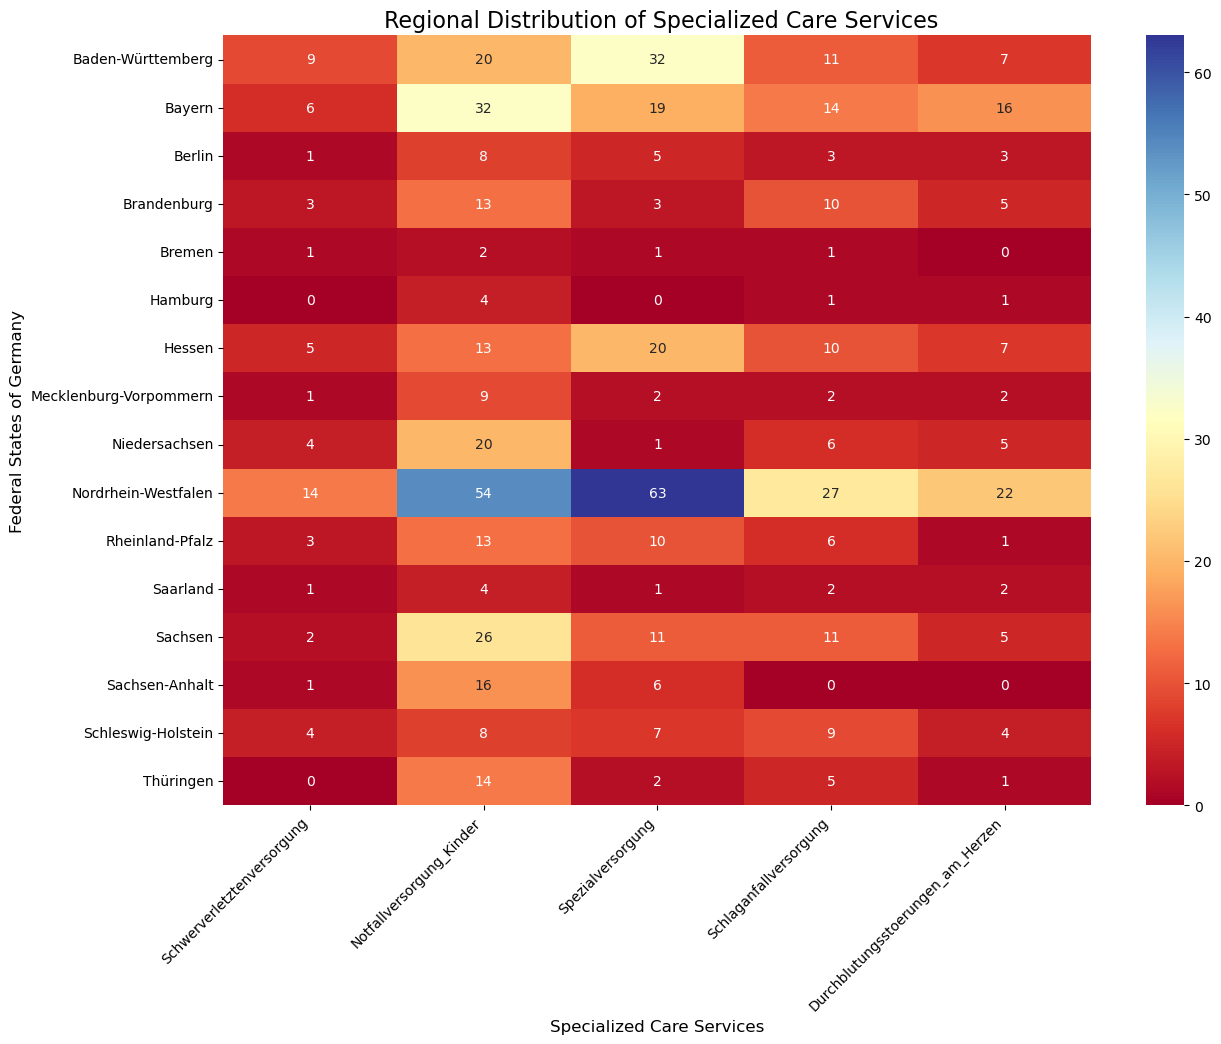

In [68]:
special_care_mapping = {
    1: "Yes",
    2: "No"}

columns_to_replace = ['Schwerverletztenversorgung', 'Notfallversorgung_Kinder', 'Spezialversorgung', 'Schlaganfallversorgung', 'Durchblutungsstoerungen_am_Herzen']

hospitals_df[columns_to_replace] = hospitals_df[columns_to_replace].replace(special_care_mapping )
# print(hospitals_df[['Schwerverletztenversorgung', 'Notfallversorgung_Kinder', 'Spezialversorgung', 'Schlaganfallversorgung', 'Durchblutungsstoerungen_am_Herzen']])

yes_counts = hospitals_df[columns_to_replace].apply(lambda x: (x == "Yes").sum())
no_counts = hospitals_df[columns_to_replace].apply(lambda x: (x == "No").sum())

summary = pd.DataFrame({"Yes_Counts": yes_counts, "No_Counts": no_counts})
#print("Overall Summary:")
#print(summary)

grouped_services = hospitals_df.groupby("Land")[columns_to_replace].apply(lambda x: (x == "Yes").sum())
#print("\nGrouped Services (Count of 'Yes'):")
#print(grouped_services)

plt.figure(figsize=(14, 10))
sns.heatmap(grouped_services, annot=True, cmap="RdYlBu", fmt="d")
plt.title(' Regional Distribution of Specialized Care Services', fontsize=16)
plt.xlabel('Specialized Care Services', fontsize=12)
plt.ylabel('Federal States of Germany', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig('Emergency Care Services.png', dpi=300, bbox_inches='tight')
plt.show()




### 7: Total number of hospital beds in Germany

In [70]:
total_beds = hospitals_df['INSG'].sum()
print(f"Total number of beds in Germany: {total_beds}")

Total number of beds in Germany: 481399


### 8. Total number of hospital beds in each federal state

Land
Nordrhein-Westfalen       112862
Bayern                     75098
Baden-Württemberg          53882
Niedersachsen              41100
Hessen                     34778
Sachsen                    25106
Rheinland-Pfalz            23432
Berlin                     20447
Schleswig-Holstein         15890
Thüringen                  15151
Brandenburg                14865
Sachsen-Anhalt             14158
Hamburg                    12954
Mecklenburg-Vorpommern     10173
Saarland                    6684
Bremen                      4819
Name: INSG, dtype: object


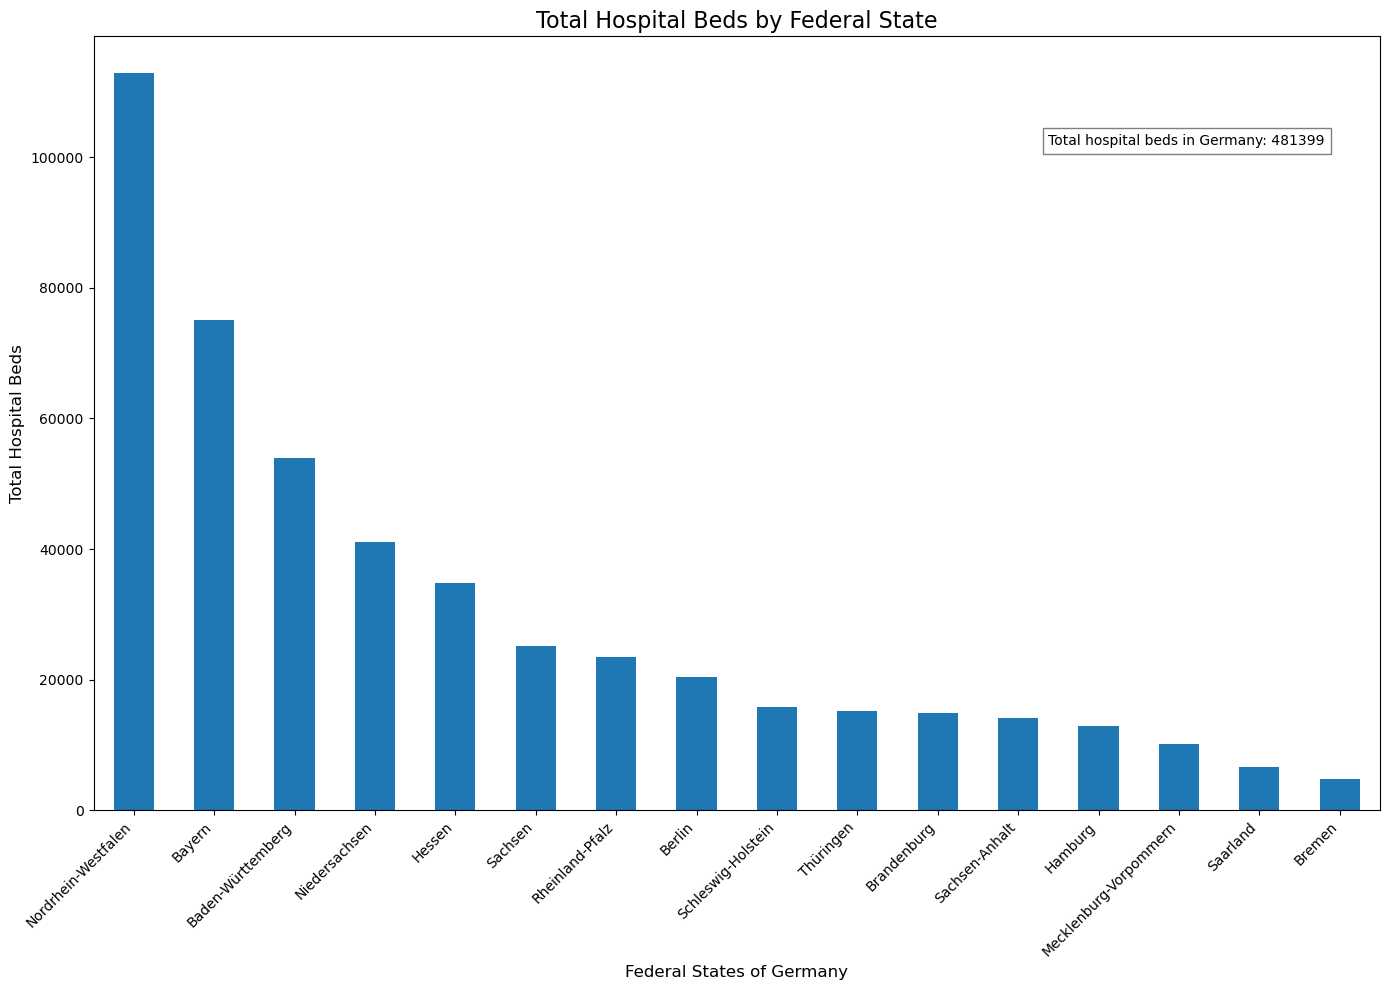

In [116]:
beds_by_state = hospitals_df.groupby('Land')['INSG'].sum().sort_values(ascending=False)
print(beds_by_state)

bd = beds_by_state.plot(kind='bar',figsize=(14, 10))
plt.title('Total Hospital Beds by Federal State', fontsize=16)
plt.xlabel('Federal States of Germany', fontsize=12)
plt.ylabel('Total Hospital Beds', fontsize=12)
plt.xticks(rotation=45, ha='right') 
text = f"Total hospital beds in Germany: {total_beds}"
plt.gcf().text(0.95, 0.85, text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5), ha='right')
#for container in bd.containers:
    #bd.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
plt.tight_layout()
plt.savefig('Total Hospital beds.png', dpi=300, bbox_inches='tight')
plt.show()

### 9. Total number of hospital beds in each City

In [74]:
beds_by_city = hospitals_df.groupby('Adresse_Ort_Standort')['INSG'].sum().reset_index().sort_values(by="INSG", ascending=False)
print(beds_by_city)

    Adresse_Ort_Standort   INSG
167               Berlin  20447
478              Hamburg  12954
749              München  10616
615                 Köln   6860
370            Frankfurt   5238
..                   ...    ...
622      Köthen (Anhalt)      0
62           Bad Doberan      0
623            Künzelsau      0
625          Lage, Lippe      0
909             Rochlitz      0

[1214 rows x 2 columns]


### 10. Total number of hospitals and beds for each Federal State

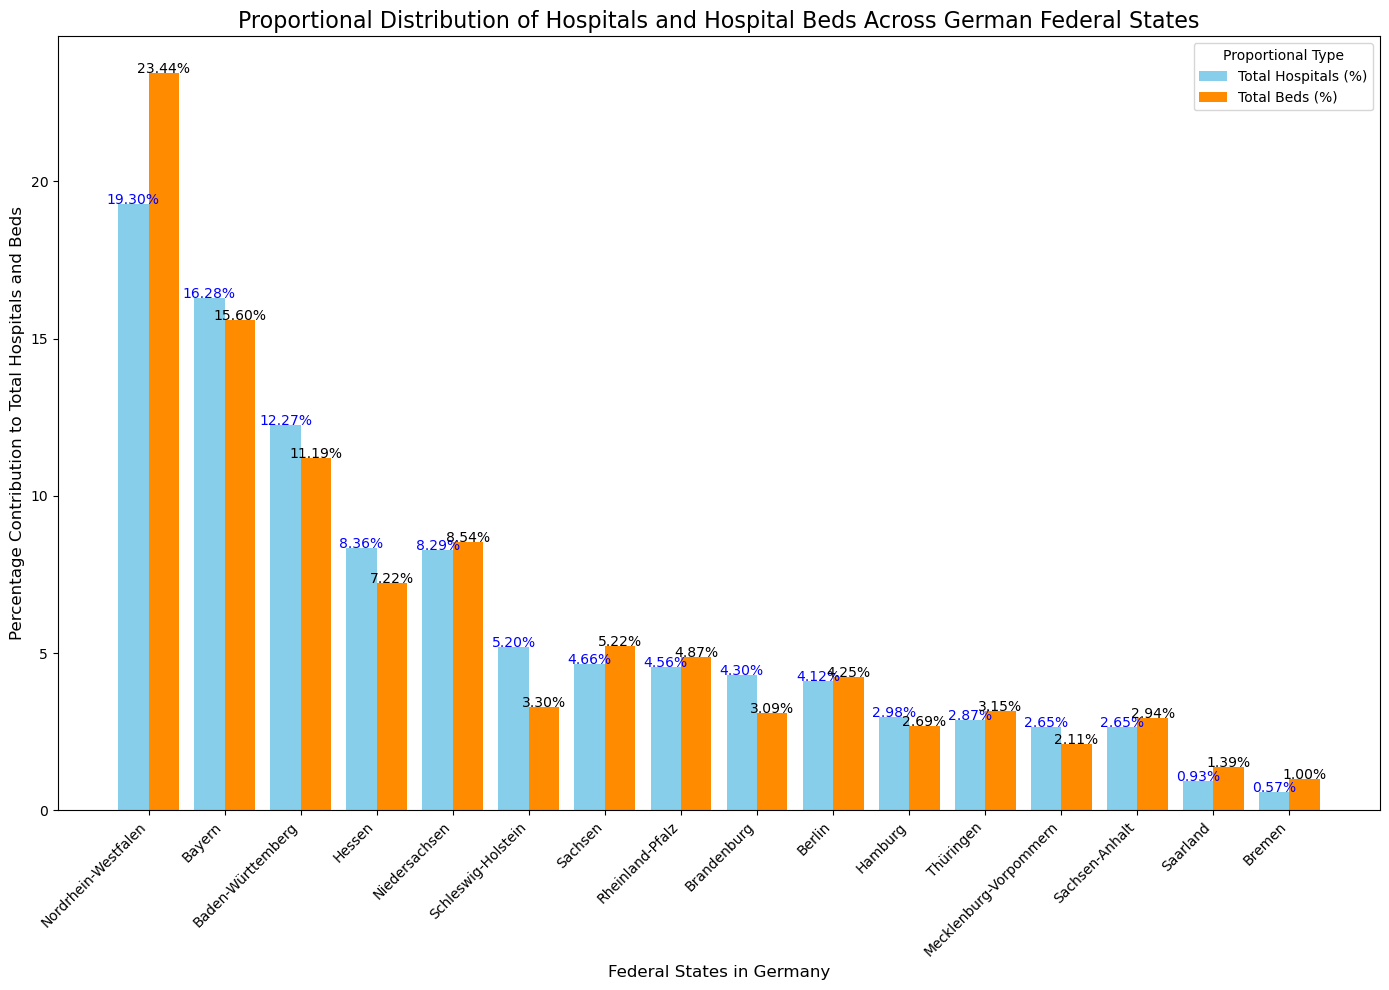

In [76]:
grouped_data = hospitals_df.groupby('Land').agg(
    Total_Hospitals=('Adresse_Name', 'count'),
    Total_Beds=('INSG', 'sum')
)

grouped_data['Hospitals_Percent'] = (grouped_data['Total_Hospitals'] / grouped_data['Total_Hospitals'].sum()) *100
grouped_data['Beds_Percent'] = (grouped_data['Total_Beds'] / grouped_data['Total_Beds'].sum()) * 100
grouped_data = grouped_data.sort_values(by='Hospitals_Percent', ascending=False)

x = range(len(grouped_data))
width = 0.4

plt.figure(figsize=(14, 10))
bars_hospitals = plt.bar([i - width / 2 for i in x], grouped_data['Hospitals_Percent'], width=width, label='Total Hospitals (%)', color='skyblue')
bars_beds = plt.bar([i + width / 2 for i in x], grouped_data['Beds_Percent'], width=width, label='Total Beds (%)', color='darkorange')

plt.xticks(x, grouped_data.index, rotation=45, ha='right')
plt.title('Proportional Distribution of Hospitals and Hospital Beds Across German Federal States', fontsize=16)
plt.xlabel('Federal States in Germany', fontsize=12)
plt.ylabel('Percentage Contribution to Total Hospitals and Beds', fontsize=12)
plt.legend(title='Proportional Type')


for bar in bars_hospitals:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.0, f'{bar.get_height():.2f}%', ha='center', fontsize=10, color='blue')
for bar in bars_beds:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.0, f'{bar.get_height():.2f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.savefig('Total Hospital and beds.png', dpi=600, bbox_inches='tight')
plt.show()

### 11. Cardiology 

#### A. Percentage of beds for cardiology in Germany

In [79]:
total_beds_by_cardiology = hospitals_df['Kardiologie'].sum()
print(f"Total number of cardiology beds in Germany: {total_beds_by_cardiology}")

percentage_beds_cardiology = (total_beds_by_cardiology / total_beds) * 100
print(f"Percentage of beds in cardiology departments: {percentage_beds_cardiology:.2f}%")

Total number of cardiology beds in Germany: 18316.0
Percentage of beds in cardiology departments: 3.80%


#### B. Cardiology Beds Per State

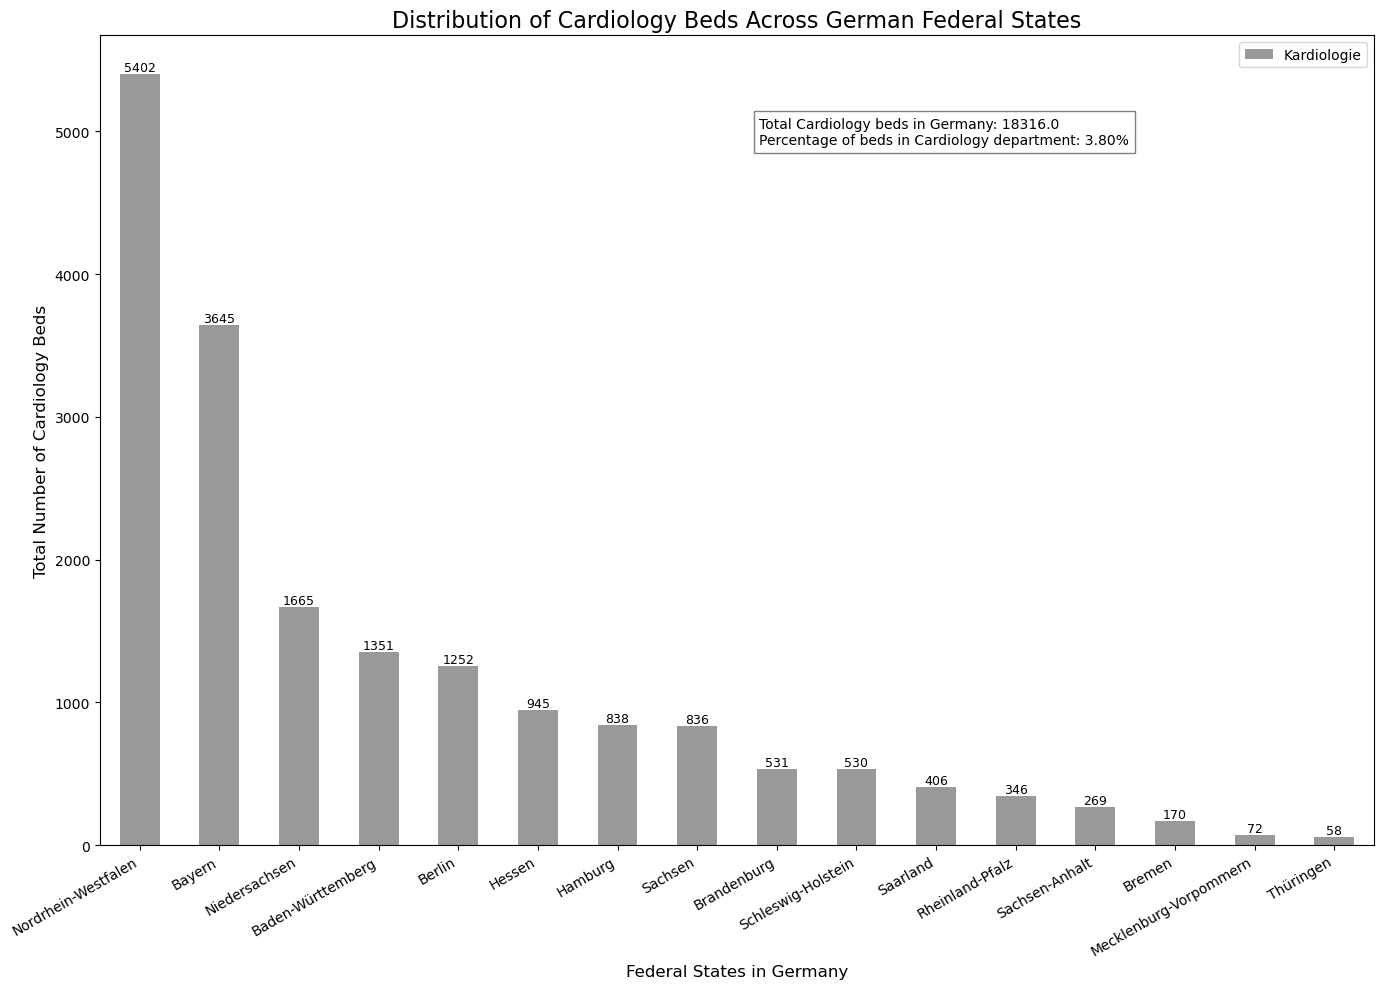

In [81]:
cardiology_beds_by_state = hospitals_df.groupby('Land')['Kardiologie'].sum().reset_index()
cardiology_beds_by_state = cardiology_beds_by_state.sort_values(by='Kardiologie', ascending=False)
#print(cardiology_beds_by_state)
cr = cardiology_beds_by_state.plot(kind='bar', x='Land', y='Kardiologie', color='#999999', figsize=(14, 10))
plt.title('Distribution of Cardiology Beds Across German Federal States', fontsize=16)
plt.xlabel('Federal States in Germany', fontsize=12)
plt.ylabel('Total Number of Cardiology Beds', fontsize=12)
plt.xticks(rotation=30, ha="right")

text = f"Total Cardiology beds in Germany: {total_beds_by_cardiology:.1f}\nPercentage of beds in Cardiology department: {percentage_beds_cardiology:.2f}%"
plt.gcf().text(0.55, 0.85, text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

#for container in cr.containers:
    #cr.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.tight_layout()
plt.savefig('Cardiology_beds.png', dpi=600, bbox_inches='tight')
plt.show()

### 12. Analyzing Top 10 Departments by Bed Count

Innere Medizin                      16.649183
Allgemeine Chirurgie                11.913610
Allgemeine Psychiatrie              11.414440
Neurologie                           5.234120
Frauenheilkunde und Geburtshilfe     4.449739
Geriatrie                            3.818039
Kardiologie                          3.804744
Endokrinologie                       3.792073
Orthopädie                           2.990243
Urologie                             2.803911
dtype: float64


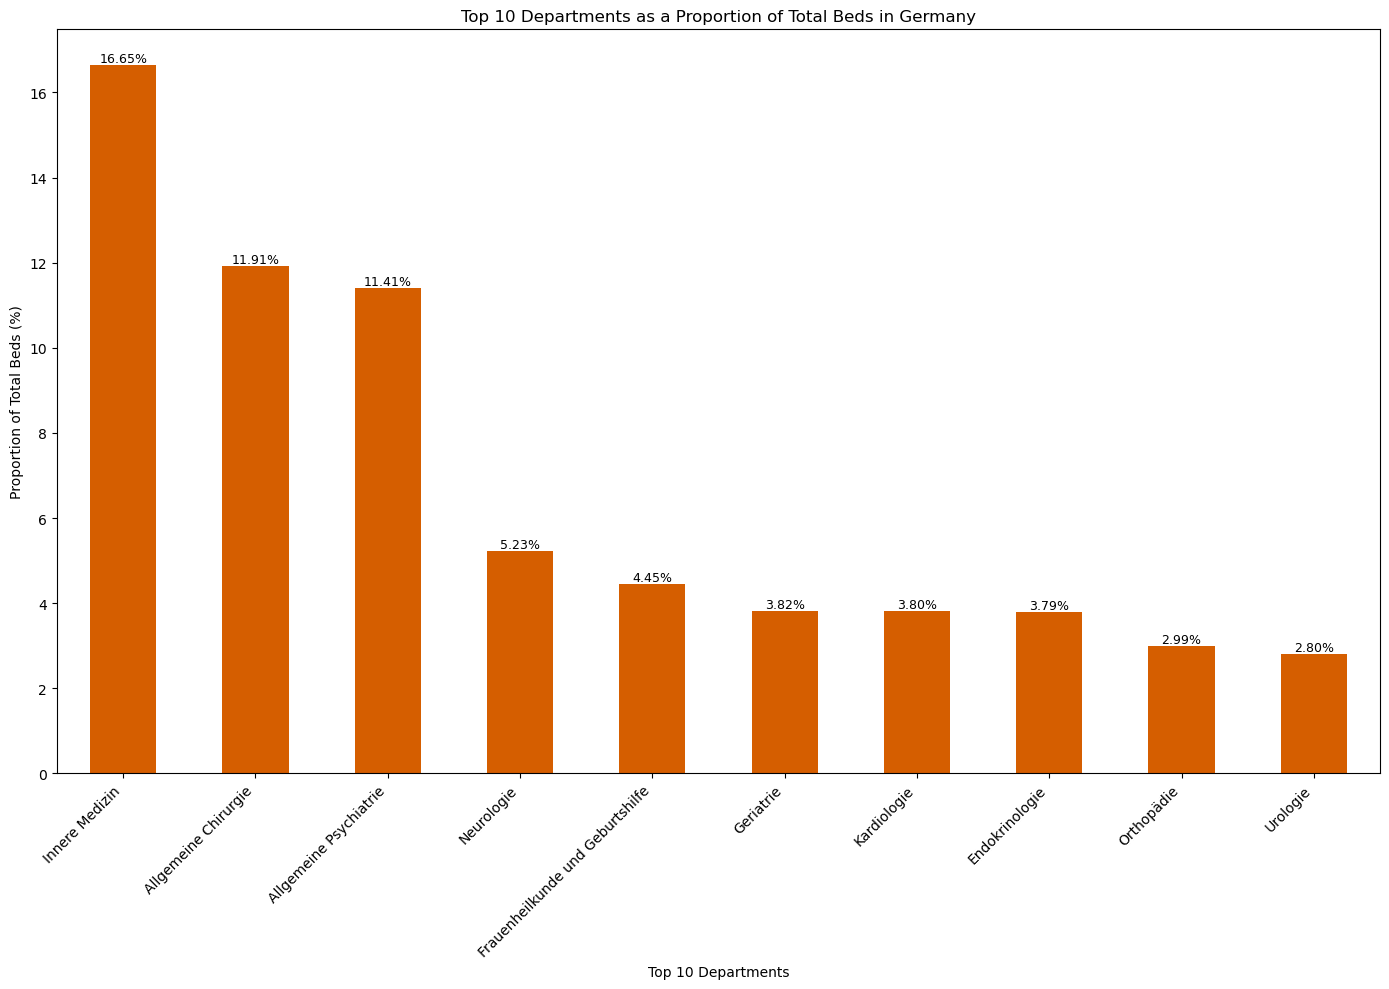

In [83]:
department_bed_counts = hospitals_df.iloc[:, 22:].sum()
sorted_departments = department_bed_counts.sort_values(ascending=False)

top_10_departments = sorted_departments.head(10)
top_10_proportion = (top_10_departments / total_beds) * 100
#print("Top 10 Departments and Their Proportion of Total Beds:")
print(top_10_proportion)
#print("Top 10 Departments and Their Proportion Total number of Beds:")
#print(top_10_departments)

dd = top_10_proportion.plot(kind='bar',color="#D55E00", figsize=(14, 10))
plt.title('Top 10 Departments as a Proportion of Total Beds in Germany')
plt.ylabel('Proportion of Total Beds (%)')
plt.xlabel('Top 10 Departments')
plt.xticks(rotation=45, ha='right') 

for container in dd.containers:
    dd.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=9)
    
plt.tight_layout()
plt.savefig('Top 10 departments.png', dpi=600, bbox_inches='tight')
plt.show()